In [2]:
import databento as db
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Establish connection and authenticate
# client = db.Historical(key="db-HsLUpjXU6TLxiHeEATVeeyWYk5mwe")

# # Fetch continuous contract data for WTI Crude Oil Futures (front month)
# data = client.timeseries.get_range(
#     start="2024-10-15",  # Specify the start date
#     end="2024-10-16",    # Optionally, specify an end date
#     dataset="GLBX.MDP3", # The dataset for Globex futures
#     symbols=["CL.c.0"],  # WTI Crude Oil, front month continuous contract
#     stype_in="continuous",  # Specify continuous contract
#     stype_out="instrument_id",  # The type of output (instrument IDs, in this case)
#     schema="ohlcv-1s",  # OHLCV data at daily frequency
# )

# Convert the result to a DataFrame
df = data.to_df()

# # Check the shape of the DataFrame (number of rows and columns)
# print(df.shape)

# Print the first few rows of the DataFrame

# # Plot the closing prices over time
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.plot(df.index, df['close'], label='WTI Crude Oil Continuous (Front Month)')
# plt.title('WTI Crude Oil Continuous Futures Price (Front Month)')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.grid(True)
# plt.show()


In [6]:
print(df.head())

                           rtype  publisher_id  instrument_id   open   high  \
ts_event                                                                      
2024-10-15 00:00:00+00:00     32             1         230943  71.66  71.67   
2024-10-15 00:00:01+00:00     32             1         230943  71.62  71.63   
2024-10-15 00:00:02+00:00     32             1         230943  71.61  71.61   
2024-10-15 00:00:03+00:00     32             1         230943  71.60  71.60   
2024-10-15 00:00:04+00:00     32             1         230943  71.58  71.59   

                             low  close  volume  symbol  
ts_event                                                 
2024-10-15 00:00:00+00:00  71.62  71.62     123  CL.c.0  
2024-10-15 00:00:01+00:00  71.62  71.62       6  CL.c.0  
2024-10-15 00:00:02+00:00  71.60  71.60      16  CL.c.0  
2024-10-15 00:00:03+00:00  71.58  71.58      20  CL.c.0  
2024-10-15 00:00:04+00:00  71.58  71.59       8  CL.c.0  


In [9]:
# Convert 'ts_event' (if it's not already) to datetime format and set it as index
if df.index.name != 'ts_event':
    df.index = pd.to_datetime(df.index)  # Ensure the index is in datetime format
    df.index.name = 'ts_event'  # Rename the index to 'ts_event' if needed

# Save the DataFrame to a CSV file in the same directory
df.to_csv('wti_crude_oil_futures_ohlcv.csv')

print(df.index)

print("Data successfully saved to wti_crude_oil_futures_ohlcv.csv")

DatetimeIndex(['2024-10-15 00:00:00+00:00', '2024-10-15 00:00:01+00:00',
               '2024-10-15 00:00:02+00:00', '2024-10-15 00:00:03+00:00',
               '2024-10-15 00:00:04+00:00', '2024-10-15 00:00:05+00:00',
               '2024-10-15 00:00:06+00:00', '2024-10-15 00:00:07+00:00',
               '2024-10-15 00:00:08+00:00', '2024-10-15 00:00:09+00:00',
               ...
               '2024-10-15 23:55:44+00:00', '2024-10-15 23:56:17+00:00',
               '2024-10-15 23:56:20+00:00', '2024-10-15 23:56:21+00:00',
               '2024-10-15 23:56:38+00:00', '2024-10-15 23:57:53+00:00',
               '2024-10-15 23:58:15+00:00', '2024-10-15 23:58:40+00:00',
               '2024-10-15 23:59:36+00:00', '2024-10-15 23:59:44+00:00'],
              dtype='datetime64[ns, UTC]', name='ts_event', length=31570, freq=None)
Data successfully saved to wti_crude_oil_futures_ohlcv.csv


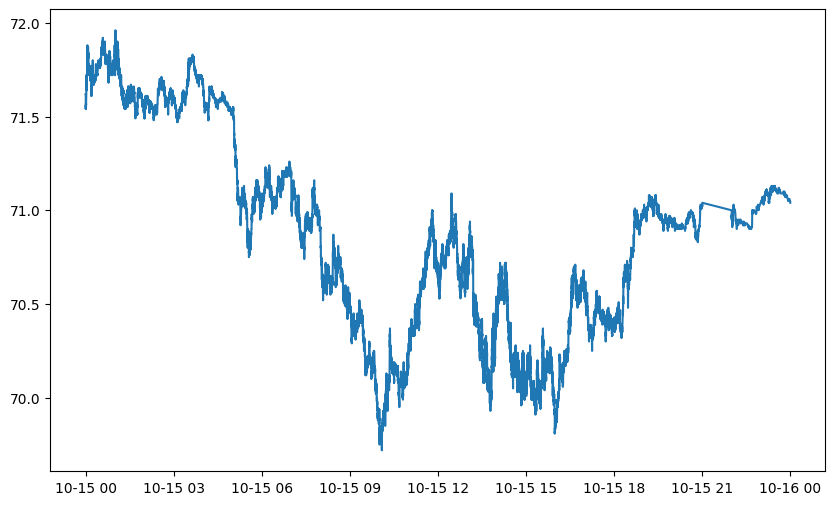

In [13]:
plt.figure(figsize=(10,6))
plt.plot(df.index,df['close'])
plt.show()

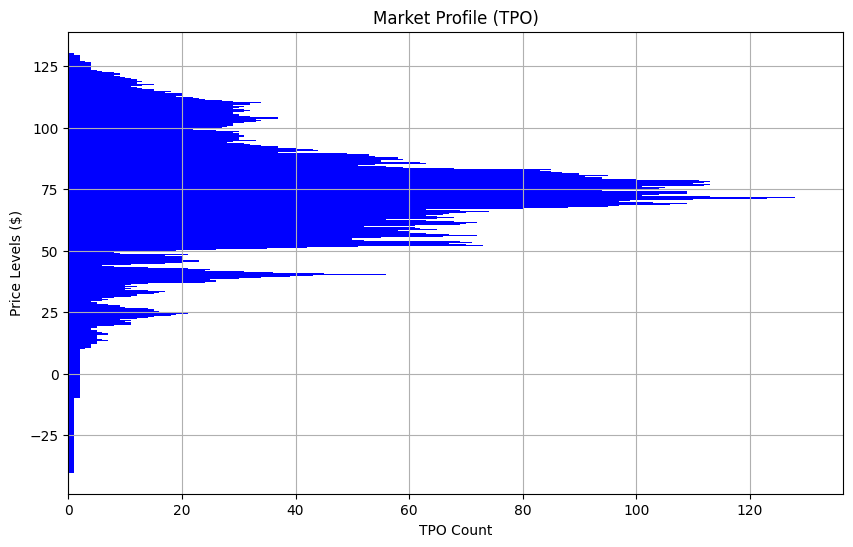

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to generate market profile (TPO) counts
def generate_market_profile(df, tick_size=0.05, price_level_range=1):
    # Initialize a dictionary to store the TPO counts for each price bucket
    tpo_dict = {}

    # Loop over each row (representing each day)
    for index, row in df.iterrows():
        # Find the range of price levels for the day from low to high
        low_price = row['low']
        high_price = row['high']

        # Iterate over each price level within the range, in steps of the tick size (0.01)
        price = low_price
        while price <= high_price:
            # Round the price to the nearest 0.50 range (bucket) and use it as the key
            bucket_price = round(price / (price_level_range * tick_size)) * price_level_range * tick_size

            # Update the count for this price bucket in the dictionary
            if bucket_price in tpo_dict:
                tpo_dict[bucket_price] += 1
            else:
                tpo_dict[bucket_price] = 1

            # Move to the next tick price level
            price += tick_size

    return tpo_dict

# Example usage:
# Assuming df contains your OHLCV data with columns: ['open', 'high', 'low', 'close']
# Example: df = pd.read_csv('your_data.csv')  # Load your data if not already in a DataFrame

# Generate the market profile TPO from the OHLCV data
tpo_dict = generate_market_profile(df)

# Convert dictionary to two lists (prices and counts) for plotting
price_levels = list(tpo_dict.keys())
tpo_counts = list(tpo_dict.values())

# Plot the Market Profile as a histogram
plt.figure(figsize=(10, 6))
plt.barh(price_levels, tpo_counts, height=0.1, color='blue')
plt.title('Market Profile (TPO)')
plt.xlabel('TPO Count')
plt.ylabel('Price Levels ($)')
plt.grid(True)
plt.show()


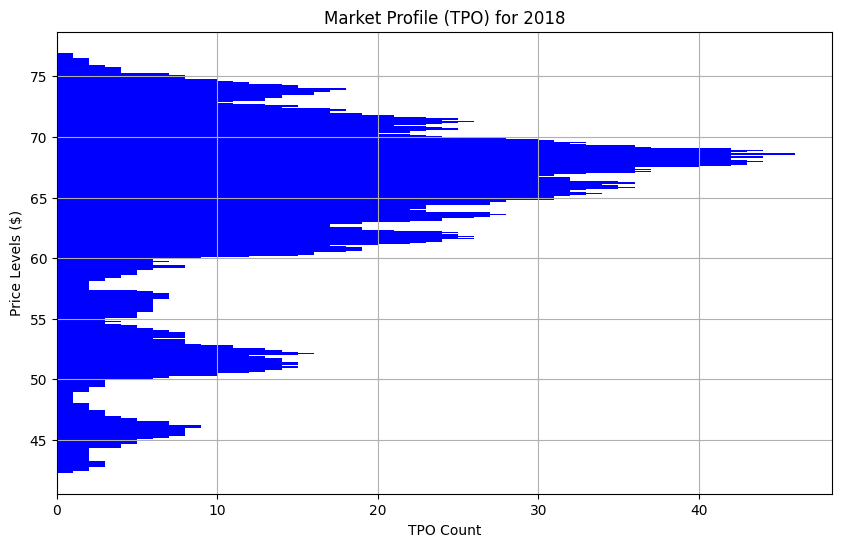

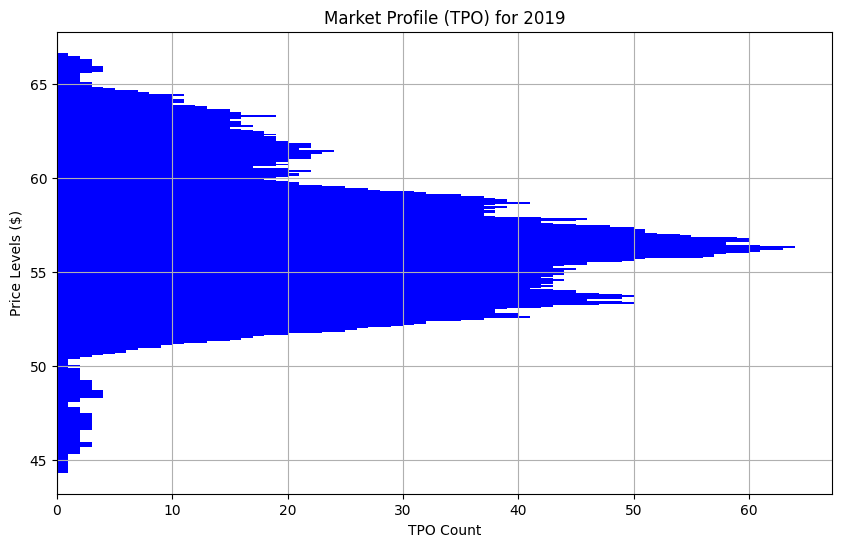

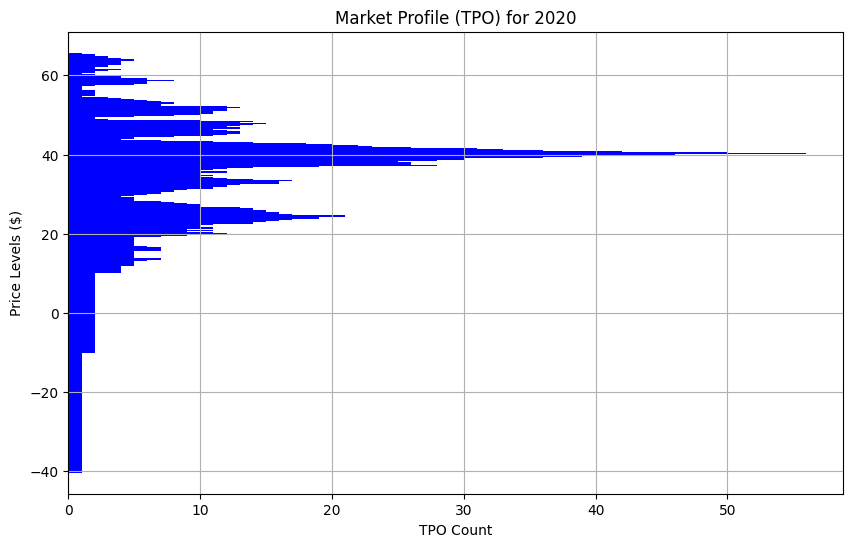

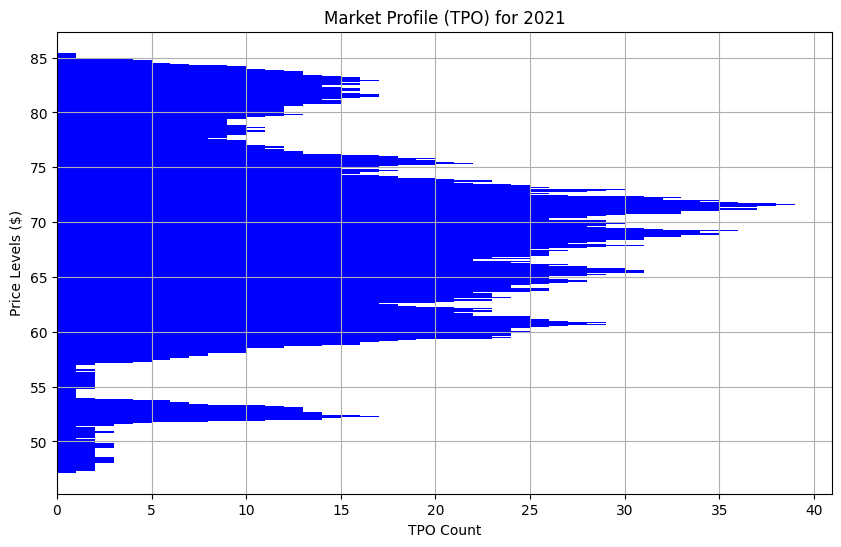

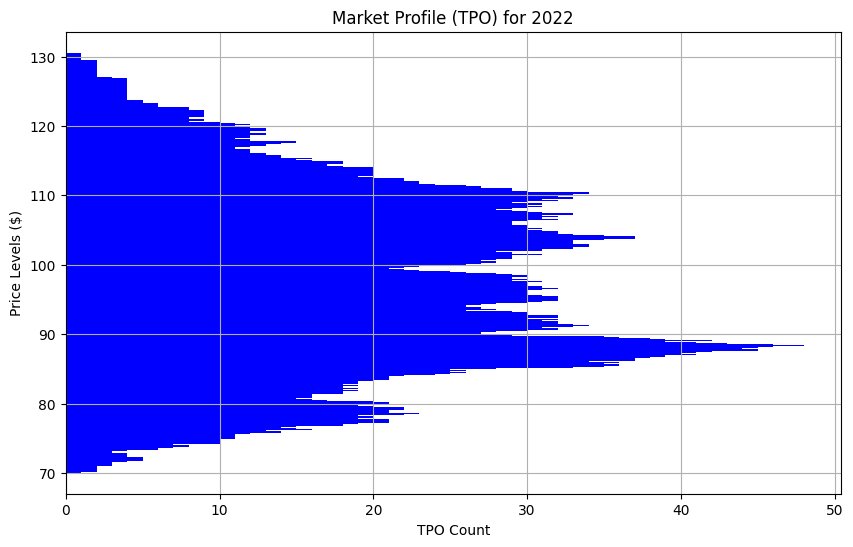

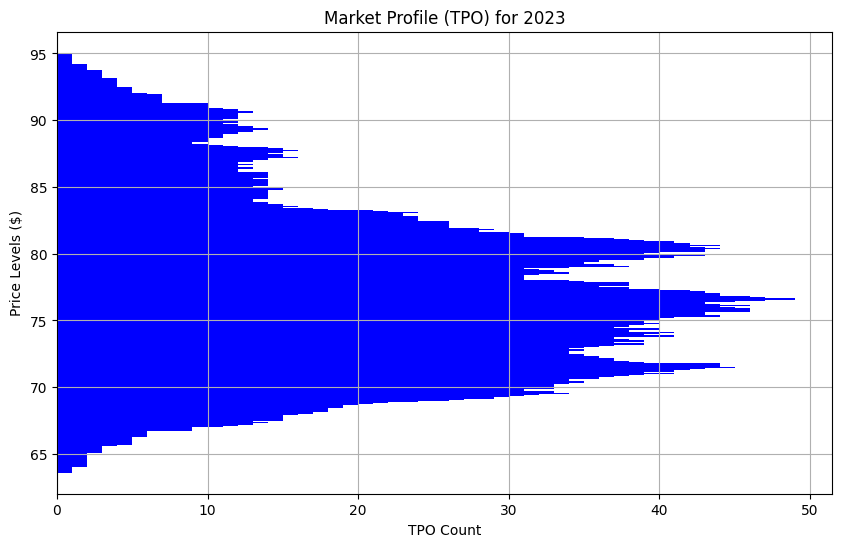

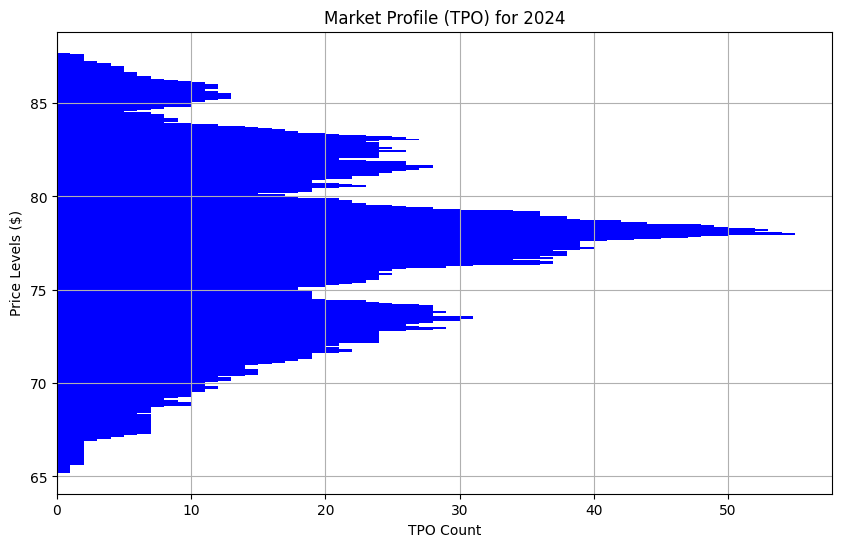

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming `df` already contains the fetched OHLCV data and `ts_event` is the DataFrame index
# Ensure that the 'ts_event' (index) is in datetime format
df.index = pd.to_datetime(df.index)

# Extract the year from the index and add it as a new column
df['Year'] = df.index.year

# Function to generate market profile (TPO) counts for a specific DataFrame
def generate_market_profile(df, tick_size=0.05, price_level_range=1):
    tpo_dict = {}

    for index, row in df.iterrows():
        low_price = row['low']
        high_price = row['high']

        # Iterate over each price level within the range, in steps of the tick size (0.01)
        price = low_price
        while price <= high_price:
            # Round the price to the nearest 0.50 range (bucket) and use it as the key
            bucket_price = round(price / (price_level_range * tick_size)) * price_level_range * tick_size

            # Update the count for this price bucket in the dictionary
            if bucket_price in tpo_dict:
                tpo_dict[bucket_price] += 1
            else:
                tpo_dict[bucket_price] = 1

            price += tick_size

    return tpo_dict

# Get the unique years in the dataset
years = df['Year'].unique()

# Loop through each year, calculate TPO, and store the result
tpo_years = {}  # Dictionary to store TPO data for each year
for year in years:
    # Filter the DataFrame for the current year
    df_year = df[df['Year'] == year]

    # Generate the market profile (TPO) for this year
    tpo_dict = generate_market_profile(df_year)

    # Store the result for each year
    tpo_years[year] = tpo_dict

    # Convert dictionary to two lists (prices and counts) for plotting
    price_levels = list(tpo_dict.keys())
    tpo_counts = list(tpo_dict.values())

    # Plot the Market Profile as a histogram for this year
    plt.figure(figsize=(10, 6))
    plt.barh(price_levels, tpo_counts, height=0.1, color='blue')
    plt.title(f'Market Profile (TPO) for {year}')
    plt.xlabel('TPO Count')
    plt.ylabel('Price Levels ($)')
    plt.grid(True)
    plt.show()

# The variable `tpo_years` contains the TPO data for each year.


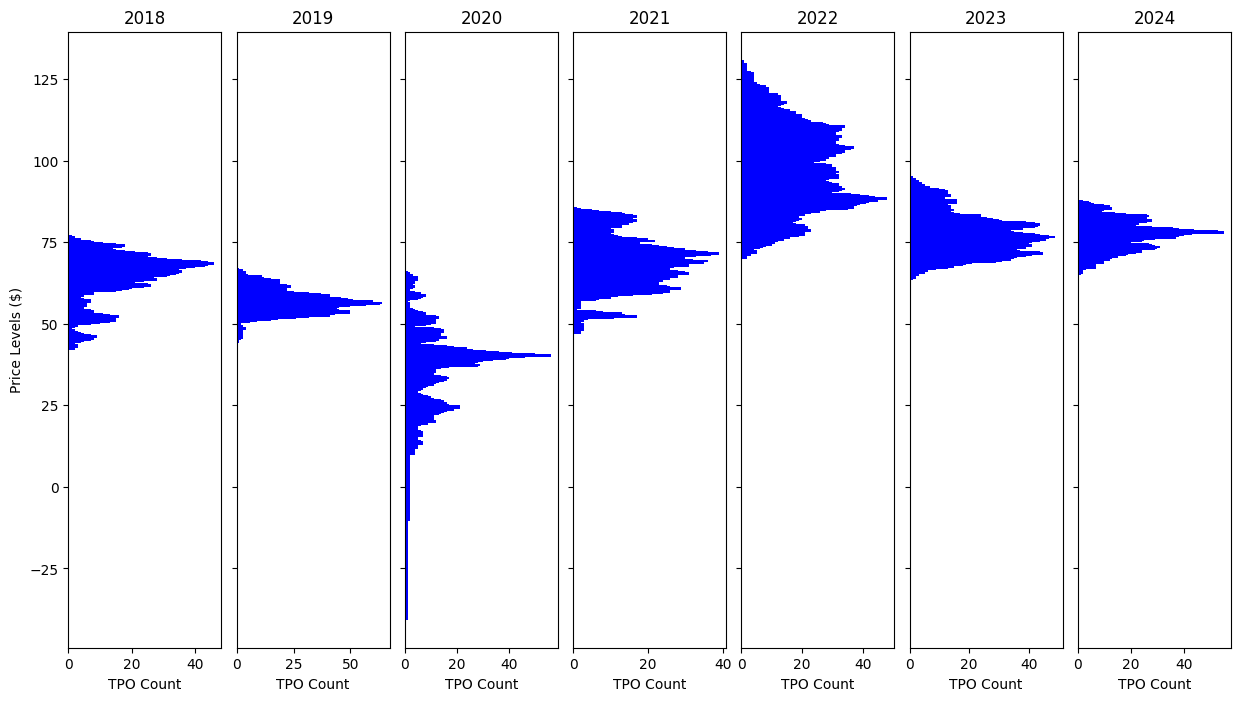

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Assuming df contains the fetched OHLCV data and 'ts_event' is the DataFrame index
df.index = pd.to_datetime(df.index)

# Extract the year from the index and add it as a new column
df['Year'] = df.index.year

# Function to generate market profile (TPO) counts for a specific DataFrame
def generate_market_profile(df, tick_size=0.05, price_level_range=1):
    tpo_dict = {}

    for index, row in df.iterrows():
        low_price = row['low']
        high_price = row['high']

        # Iterate over each price level within the range, in steps of the tick size (0.01)
        price = low_price
        while price <= high_price:
            # Round the price to the nearest 0.50 range (bucket) and use it as the key
            bucket_price = round(round(price / (price_level_range * tick_size)) * price_level_range * tick_size, 2)

            # Update the count for this price bucket in the dictionary
            if bucket_price in tpo_dict:
                tpo_dict[bucket_price] += 1
            else:
                tpo_dict[bucket_price] = 1

            price += tick_size
     # Ensure the price levels (keys) are sorted from highest to lowest
    sorted_tpo_dict = dict(sorted(tpo_dict.items(), key=lambda x: x[0], reverse=True))

    return sorted_tpo_dict

# Get the unique years in the dataset
years = df['Year'].unique()

# Collect data for all years
tpo_years = {}  # Dictionary to store TPO data for each year
all_price_levels = set()  # Set to track all price levels across all years

for year in years:
    # Filter the DataFrame for the current year
    df_year = df[df['Year'] == year]

    # Generate the market profile (TPO) for this year
    tpo_dict = generate_market_profile(df_year)

    # Store the result for each year
    tpo_years[year] = tpo_dict

    # Track all unique price levels across the years
    all_price_levels.update(tpo_dict.keys())

# Save the tpo_years dictionary as a Pickle file
with open('tpo_years.pkl', 'wb') as pkl_file:
    pickle.dump(tpo_years, pkl_file)

# Sort price levels to maintain order in the plots
all_price_levels = sorted(all_price_levels)

# Create a figure with subplots (one for each year) arranged side by side
fig, axes = plt.subplots(1, len(years), figsize=(15, 8), sharey=True)

# Adjust space between the subplots
fig.subplots_adjust(wspace=0.1)

# Plot each year's TPO in a separate subplot
for i, year in enumerate(years):
    ax = axes[i]  # Get the current axis for the year
    tpo_dict = tpo_years[year]  # Get the TPO data for the current year
    
    # Create a list of TPO counts aligned with the global price levels
    tpo_counts = [tpo_dict.get(price, 0) for price in all_price_levels]
    
    # Plot a horizontal bar chart for the current year
    ax.barh(all_price_levels, tpo_counts, color='blue')
    
    # Set the title and label
    ax.set_title(f'{year}')
    ax.set_xlabel('TPO Count')

# Set the common y-axis label (price levels)
axes[0].set_ylabel('Price Levels ($)')

# Show the plot
plt.show()


In [19]:
with open('tpo_years.pkl', 'rb') as pkl_file:
    tpo_years_loaded = pickle.load(pkl_file)

# Check if the loaded data matches the original
print(tpo_years_loaded)

{np.int32(2018): {76.9: 1, 76.85: 1, 76.8: 1, 76.75: 1, 76.7: 1, 76.65: 1, 76.6: 1, 76.55: 1, 76.5: 1, 76.45: 2, 76.4: 2, 76.35: 2, 76.3: 2, 76.25: 2, 76.2: 2, 76.15: 2, 76.1: 2, 76.05: 2, 76.0: 2, 75.95: 2, 75.9: 3, 75.85: 3, 75.8: 3, 75.75: 4, 75.7: 4, 75.65: 4, 75.6: 4, 75.55: 4, 75.5: 4, 75.45: 4, 75.4: 4, 75.35: 4, 75.3: 4, 75.25: 6, 75.2: 7, 75.15: 7, 75.1: 8, 75.05: 8, 75.0: 8, 74.95: 8, 74.9: 7, 74.85: 7, 74.8: 8, 74.75: 9, 74.7: 10, 74.65: 10, 74.6: 11, 74.55: 11, 74.5: 11, 74.45: 12, 74.4: 12, 74.35: 12, 74.3: 14, 74.25: 15, 74.2: 15, 74.15: 15, 74.1: 15, 74.05: 15, 74.0: 18, 73.95: 17, 73.9: 18, 73.85: 17, 73.8: 16, 73.75: 17, 73.7: 16, 73.65: 16, 73.6: 15, 73.55: 16, 73.5: 15, 73.45: 14, 73.4: 14, 73.35: 14, 73.3: 14, 73.25: 13, 73.2: 13, 73.15: 13, 73.1: 13, 73.05: 13, 73.0: 12, 72.95: 11, 72.9: 9, 72.85: 9, 72.8: 10, 72.75: 11, 72.7: 12, 72.65: 13, 72.6: 13, 72.55: 15, 72.5: 14, 72.45: 13, 72.4: 14, 72.35: 15, 72.3: 17, 72.25: 18, 72.2: 18, 72.15: 17, 72.1: 16, 72.05: 16,

/var/folders/qp/2v0dqqw110gbk64jw3vk6kn80000gn/T/ipykernel_11191/1045083945.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Quarter'] = df.index.to_period('Q')  # Format example: '2018Q1', '2018Q2', etc.


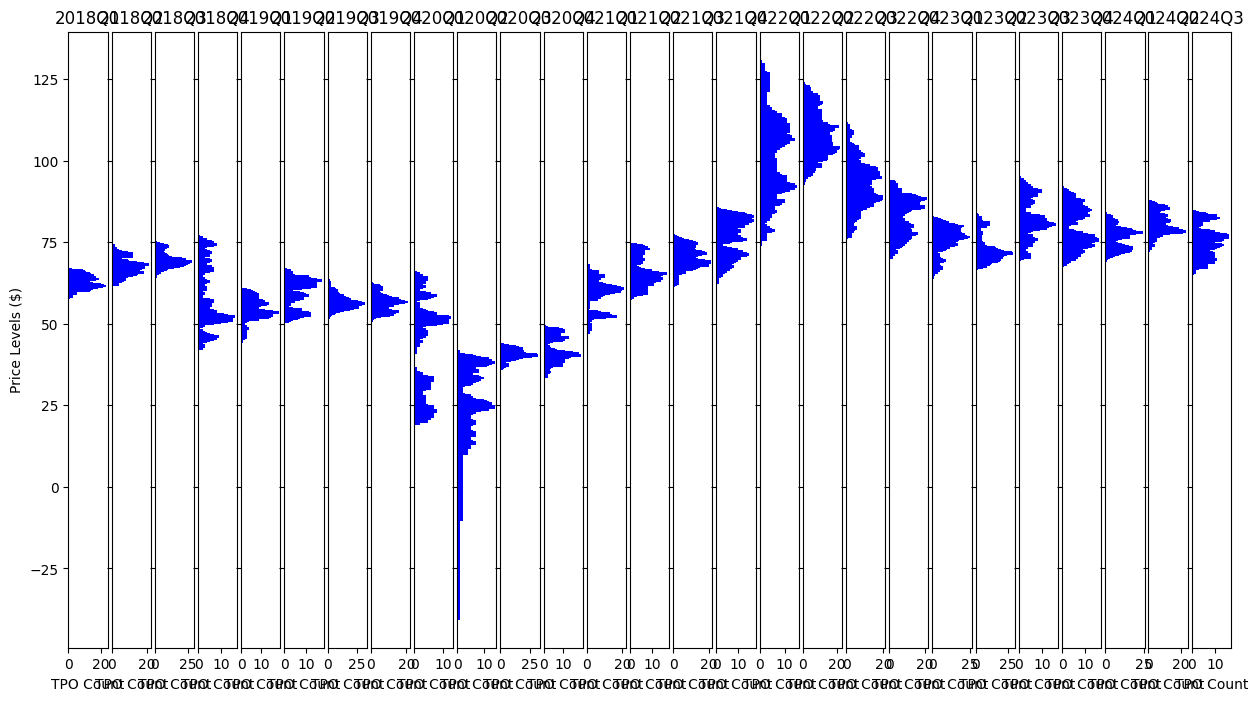

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df contains the fetched OHLCV data and 'ts_event' is the DataFrame index
df.index = pd.to_datetime(df.index)

# Extract the quarter from the index and add it as a new column
df['Quarter'] = df.index.to_period('Q')  # Format example: '2018Q1', '2018Q2', etc.

# Function to generate market profile (TPO) counts for a specific DataFrame
def generate_market_profile(df, tick_size=0.05, price_level_range=1):
    tpo_dict = {}

    for index, row in df.iterrows():
        low_price = row['low']
        high_price = row['high']

        # Iterate over each price level within the range, in steps of the tick size (0.01)
        price = low_price
        while price <= high_price:
            # Round the price to the nearest 0.50 range (bucket) and use it as the key
            bucket_price = round(round(price / (price_level_range * tick_size)) * price_level_range * tick_size, 2)

            # Update the count for this price bucket in the dictionary
            if bucket_price in tpo_dict:
                tpo_dict[bucket_price] += 1
            else:
                tpo_dict[bucket_price] = 1

            price += tick_size

    # Ensure the price levels (keys) are sorted from highest to lowest
    sorted_tpo_dict = dict(sorted(tpo_dict.items(), key=lambda x: x[0], reverse=True))

    return sorted_tpo_dict

# Get the unique quarters in the dataset
quarters = df['Quarter'].unique()

# Collect data for all quarters
tpo_quarters = {}  # Dictionary to store TPO data for each quarter
all_price_levels = set()  # Set to track all price levels across all quarters

for quarter in quarters:
    # Filter the DataFrame for the current quarter
    df_quarter = df[df['Quarter'] == quarter]

    # Generate the market profile (TPO) for this quarter
    tpo_dict = generate_market_profile(df_quarter)

    # Store the result for each quarter
    tpo_quarters[quarter] = tpo_dict

    # Track all unique price levels across the quarters
    all_price_levels.update(tpo_dict.keys())

# Save the tpo_years dictionary as a Pickle file
with open('tpo_quarters.pkl', 'wb') as pkl_file:
    pickle.dump(tpo_quarters, pkl_file)

# Sort price levels to maintain order in the plots
all_price_levels = sorted(all_price_levels)

# Create a figure with subplots (one for each quarter) arranged side by side
fig, axes = plt.subplots(1, len(quarters), figsize=(15, 8), sharey=True)

# Adjust space between the subplots
fig.subplots_adjust(wspace=0.1)

# Plot each quarter's TPO in a separate subplot
for i, quarter in enumerate(quarters):
    ax = axes[i]  # Get the current axis for the quarter
    tpo_dict = tpo_quarters[quarter]  # Get the TPO data for the current quarter
    
    # Create a list of TPO counts aligned with the global price levels
    tpo_counts = [tpo_dict.get(price, 0) for price in all_price_levels]
    
    # Plot a horizontal bar chart for the current quarter
    ax.barh(all_price_levels, tpo_counts, color='blue')
    
    # Set the title and label
    ax.set_title(f'{quarter}')
    ax.set_xlabel('TPO Count')

# Set the common y-axis label (price levels)
axes[0].set_ylabel('Price Levels ($)')

# Show the plot
plt.show()


/var/folders/qp/2v0dqqw110gbk64jw3vk6kn80000gn/T/ipykernel_11191/1329419865.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df.index.to_period('M')  # Format example: '2018-01', '2018-02', etc.


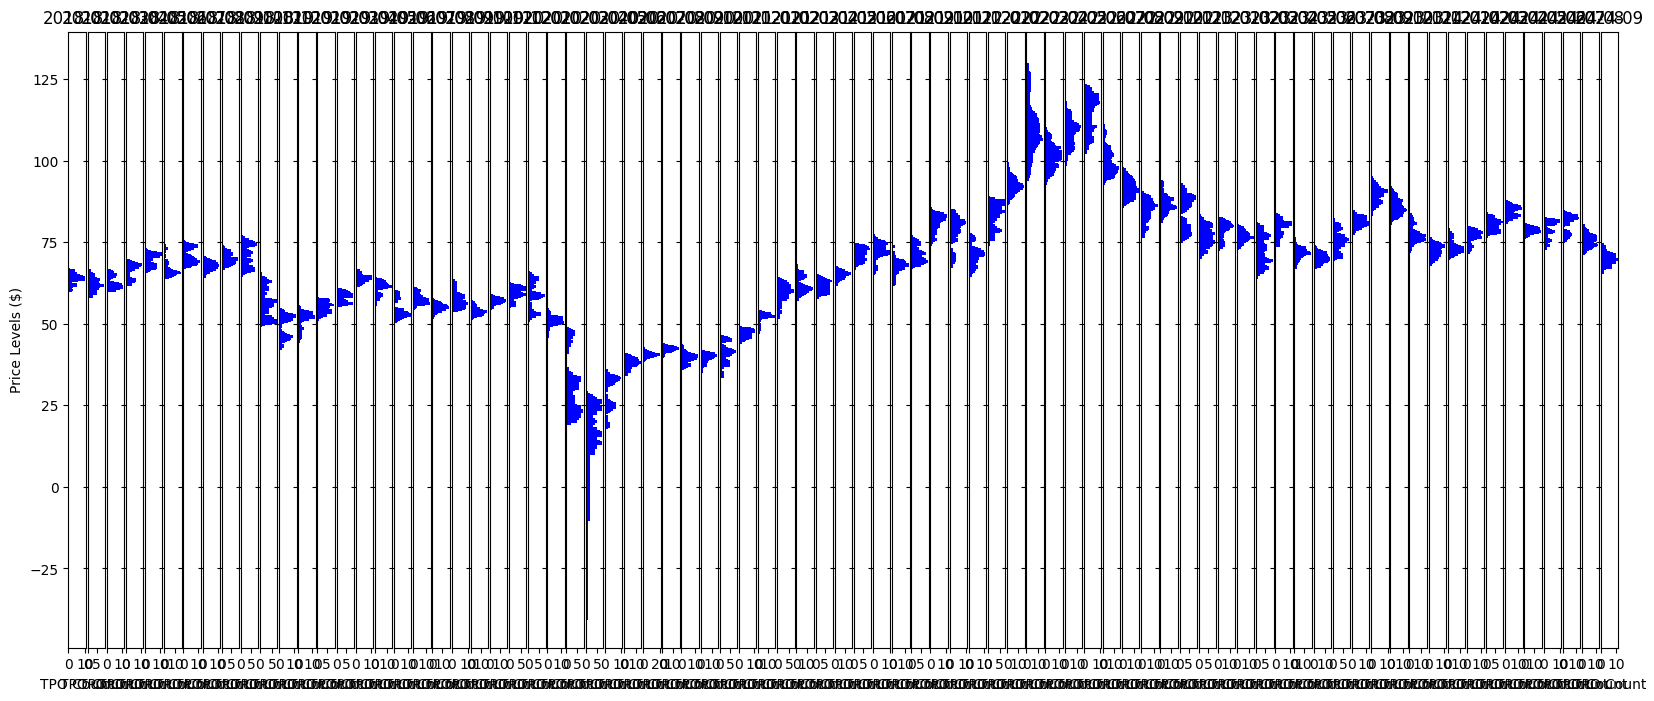

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df contains the fetched OHLCV data and 'ts_event' is the DataFrame index
df.index = pd.to_datetime(df.index)

# Extract the month from the index and add it as a new column
df['Month'] = df.index.to_period('M')  # Format example: '2018-01', '2018-02', etc.

# Function to generate market profile (TPO) counts for a specific DataFrame
def generate_market_profile(df, tick_size=0.05, price_level_range=1):
    tpo_dict = {}

    for index, row in df.iterrows():
        low_price = row['low']
        high_price = row['high']

        # Iterate over each price level within the range, in steps of the tick size (0.01)
        price = low_price
        while price <= high_price:
            # Round the price to the nearest 0.50 range (bucket) and use it as the key
            bucket_price = round(round(price / (price_level_range * tick_size)) * price_level_range * tick_size, 2)

            # Update the count for this price bucket in the dictionary
            if bucket_price in tpo_dict:
                tpo_dict[bucket_price] += 1
            else:
                tpo_dict[bucket_price] = 1

            price += tick_size

    # Ensure the price levels (keys) are sorted from highest to lowest
    sorted_tpo_dict = dict(sorted(tpo_dict.items(), key=lambda x: x[0], reverse=True))

    return sorted_tpo_dict

# Get the unique months in the dataset
months = df['Month'].unique()

# Collect data for all months
tpo_months = {}  # Dictionary to store TPO data for each month
all_price_levels = set()  # Set to track all price levels across all months

for month in months:
    # Filter the DataFrame for the current month
    df_month = df[df['Month'] == month]

    # Generate the market profile (TPO) for this month
    tpo_dict = generate_market_profile(df_month)

    # Store the result for each month
    tpo_months[month] = tpo_dict

    # Track all unique price levels across the months
    all_price_levels.update(tpo_dict.keys())

# Save the tpo_years dictionary as a Pickle file
with open('tpo_months.pkl', 'wb') as pkl_file:
    pickle.dump(tpo_months, pkl_file)

# Sort price levels to maintain order in the plots
all_price_levels = sorted(all_price_levels)

# Create a figure with subplots (one for each month) arranged side by side
fig, axes = plt.subplots(1, len(months), figsize=(20, 8), sharey=True)

# Adjust space between the subplots
fig.subplots_adjust(wspace=0.1)

# Plot each month's TPO in a separate subplot
for i, month in enumerate(months):
    ax = axes[i]  # Get the current axis for the month
    tpo_dict = tpo_months[month]  # Get the TPO data for the current month
    
    # Create a list of TPO counts aligned with the global price levels
    tpo_counts = [tpo_dict.get(price, 0) for price in all_price_levels]
    
    # Plot a horizontal bar chart for the current month
    ax.barh(all_price_levels, tpo_counts, color='blue')
    
    # Set the title and label
    ax.set_title(f'{month}')
    ax.set_xlabel('TPO Count')

# Set the common y-axis label (price levels)
axes[0].set_ylabel('Price Levels ($)')

# Show the plot
plt.show()


/var/folders/qp/2v0dqqw110gbk64jw3vk6kn80000gn/T/ipykernel_11191/2029510171.py:5: BentoWarning: The streaming request contained one or more days which have reduced quality: 2018-10-21 (degraded), 2019-01-15 (degraded), 2019-02-22 (degraded)... See: https://databento.com/docs/api-reference-historical/metadata/metadata-get-dataset-condition
  data_ = client.timeseries.get_range(


(39518, 9)
                           rtype  publisher_id  instrument_id   open   high  \
ts_event                                                                      
2018-01-01 23:00:00+00:00     34             1         253894  60.20  60.28   
2018-01-02 00:00:00+00:00     34             1         253894  60.23  60.27   
2018-01-02 01:00:00+00:00     34             1         253894  60.24  60.68   
2018-01-02 02:00:00+00:00     34             1         253894  60.58  60.73   
2018-01-02 03:00:00+00:00     34             1         253894  60.64  60.65   

                             low  close  volume  symbol  
ts_event                                                 
2018-01-01 23:00:00+00:00  60.13  60.23    3380  CL.c.0  
2018-01-02 00:00:00+00:00  60.22  60.25    1501  CL.c.0  
2018-01-02 01:00:00+00:00  60.20  60.59   14477  CL.c.0  
2018-01-02 02:00:00+00:00  60.58  60.64    8349  CL.c.0  
2018-01-02 03:00:00+00:00  60.57  60.58    2992  CL.c.0  


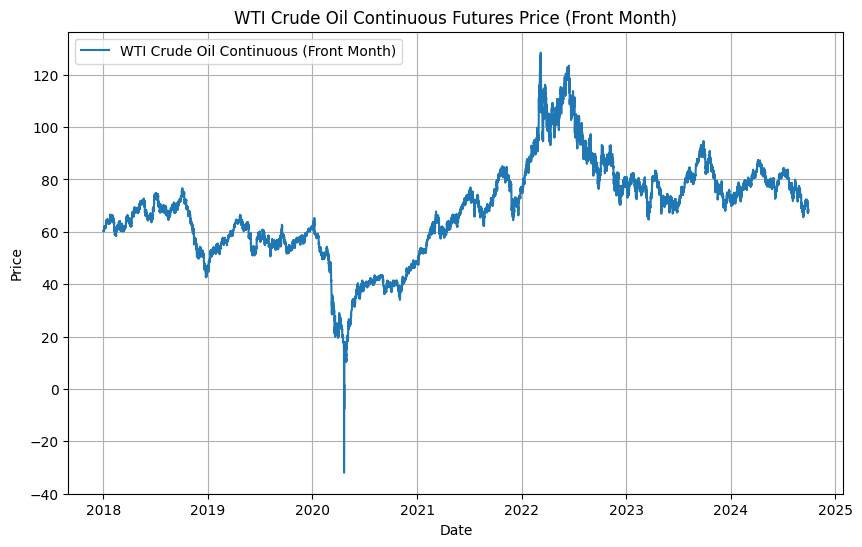

In [8]:
# Establish connection and authenticate
client = db.Historical(key="db-HsLUpjXU6TLxiHeEATVeeyWYk5mwe")

# Fetch continuous contract data for WTI Crude Oil Futures (front month)
data_ = client.timeseries.get_range(
    start="2018-01-01",  # Specify the start date
    end="2024-09-28",    # Optionally, specify an end date
    dataset="GLBX.MDP3", # The dataset for Globex futures
    symbols=["CL.c.0"],  # WTI Crude Oil, front month continuous contract
    stype_in="continuous",  # Specify continuous contract
    stype_out="instrument_id",  # The type of output (instrument IDs, in this case)
    schema="ohlcv-1h",  # OHLCV data at daily frequency
)

# Convert the result to a DataFrame
df_ = data_.to_df()

# Check the shape of the DataFrame (number of rows and columns)
print(df_.shape)

# Print the first few rows of the DataFrame
print(df_.head())

# Plot the closing prices over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_.index, df_['close'], label='WTI Crude Oil Continuous (Front Month)')
plt.title('WTI Crude Oil Continuous Futures Price (Front Month)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df contains the fetched OHLCV data with hourly granularity and 'ts_event' is the DataFrame index
df_.index = pd.to_datetime(df_.index)

# Extract the week and day from the index to group data accordingly
df_['Week'] = df_.index.to_period('W')  # Group by weekly periods (e.g., '2023-W01')
df_['Day'] = df_.index.to_period('D')   # Group by daily periods (e.g., '2023-09-28')

# Function to generate market profile (TPO) counts for a specific DataFrame
def generate_market_profile(df_, tick_size=0.05, price_level_range=1):
    tpo_dict = {}

    for index, row in df_.iterrows():
        low_price = row['low']
        high_price = row['high']

        # Iterate over each price level within the range, in steps of the tick size (e.g., 0.05)
        price = low_price
        while price <= high_price:
            # Round the price to the nearest bucket (e.g., $0.05 or $0.25 increments) and use it as the key
            bucket_price = round(round(price / (price_level_range * tick_size)) * price_level_range * tick_size, 2)

            # Update the count for this price bucket in the dictionary
            if bucket_price in tpo_dict:
                tpo_dict[bucket_price] += 1
            else:
                tpo_dict[bucket_price] = 1

            price += tick_size

    # Ensure the price levels (keys) are sorted from highest to lowest
    sorted_tpo_dict = dict(sorted(tpo_dict.items(), key=lambda x: x[0], reverse=True))

    return sorted_tpo_dict

# Step 3: Get the unique weeks and days in the dataset for building profiles
weeks = df_['Week'].unique()
days = df_['Day'].unique()

# Create dictionaries to store TPO data for weeks and days
tpo_weeks = {}
tpo_days = {}
all_price_levels_weeks = set()
all_price_levels_days = set()

# Step 4: Generate TPO profiles for each week
for week in weeks:
    df_week = df_[df_['Week'] == week]  # Filter the DataFrame for the current week
    tpo_dict = generate_market_profile(df_week)  # Generate the weekly TPO profile
    tpo_weeks[week] = tpo_dict  # Store the result
    all_price_levels_weeks.update(tpo_dict.keys())  # Track all price levels across weeks

# Step 5: Generate TPO profiles for each day
for day in days:
    df_day = df_[df_['Day'] == day]  # Filter the DataFrame for the current day
    tpo_dict = generate_market_profile(df_day)  # Generate the daily TPO profile
    tpo_days[day] = tpo_dict  # Store the result
    all_price_levels_days.update(tpo_dict.keys())  # Track all price levels across days

# Save the tpo_years dictionary as a Pickle file
with open('tpo_weeks.pkl', 'wb') as pkl_file:
    pickle.dump(tpo_weeks, pkl_file)

# Save the tpo_years dictionary as a Pickle file
with open('tpo_days.pkl', 'wb') as pkl_file:
    pickle.dump(tpo_days, pkl_file)

# Step 6: Sort price levels to maintain order in the plots
all_price_levels_weeks = sorted(all_price_levels_weeks)
all_price_levels_days = sorted(all_price_levels_days)

# # Step 7: Plot Weekly TPO Profiles
# fig, axes = plt.subplots(1, len(weeks), figsize=(20, 8), sharey=True)
# fig.subplots_adjust(wspace=0.1)
# for i, week in enumerate(weeks):
#     ax = axes[i]
#     tpo_dict = tpo_weeks[week]
#     tpo_counts = [tpo_dict.get(price, 0) for price in all_price_levels_weeks]
#     ax.barh(all_price_levels_weeks, tpo_counts, color='blue')
#     ax.set_title(f'{week}')
#     ax.set_xlabel('TPO Count')
# axes[0].set_ylabel('Price Levels ($)')
# plt.show()

# # Step 8: Plot Daily TPO Profiles
# fig, axes = plt.subplots(1, len(days), figsize=(20, 8), sharey=True)
# fig.subplots_adjust(wspace=0.1)
# for i, day in enumerate(days):
#     ax = axes[i]
#     tpo_dict = tpo_days[day]
#     tpo_counts = [tpo_dict.get(price, 0) for price in all_price_levels_days]
#     ax.barh(all_price_levels_days, tpo_counts, color='green')
#     ax.set_title(f'{day}')
#     ax.set_xlabel('TPO Count')
# axes[0].set_ylabel('Price Levels ($)')
# plt.show()


/var/folders/qp/2v0dqqw110gbk64jw3vk6kn80000gn/T/ipykernel_11191/679242904.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_['Week'] = df_.index.to_period('W')  # Group by weekly periods (e.g., '2023-W01')
/var/folders/qp/2v0dqqw110gbk64jw3vk6kn80000gn/T/ipykernel_11191/679242904.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_['Day'] = df_.index.to_period('D')   # Group by daily periods (e.g., '2023-09-28')


In [24]:
with open('tpo_weeks.pkl', 'rb') as pkl_file:
    tpo_weeks_loaded = pickle.load(pkl_file)

# Check if the loaded data matches the original
print(tpo_weeks_loaded)

{Period('2018-01-01/2018-01-07', 'W-SUN'): {62.2: 1, 62.15: 3, 62.1: 7, 62.05: 10, 62.0: 10, 61.95: 18, 61.9: 19, 61.85: 20, 61.8: 15, 61.75: 14, 61.7: 10, 61.65: 10, 61.6: 9, 61.55: 10, 61.5: 14, 61.45: 16, 61.4: 14, 61.35: 13, 61.3: 6, 61.25: 4, 61.2: 3, 61.15: 3, 61.1: 4, 61.05: 2, 61.0: 2, 60.95: 1, 60.9: 3, 60.85: 3, 60.8: 3, 60.75: 4, 60.7: 4, 60.65: 6, 60.6: 9, 60.55: 8, 60.5: 10, 60.45: 13, 60.4: 19, 60.35: 20, 60.3: 14, 60.25: 13, 60.2: 9, 60.15: 5, 60.1: 1}, Period('2018-01-08/2018-01-14', 'W-SUN'): {64.75: 1, 64.7: 1, 64.65: 2, 64.6: 3, 64.55: 3, 64.5: 6, 64.45: 7, 64.4: 8, 64.35: 7, 64.3: 6, 64.25: 7, 64.2: 7, 64.15: 6, 64.1: 6, 64.05: 6, 64.0: 7, 63.95: 8, 63.9: 8, 63.85: 7, 63.8: 7, 63.75: 5, 63.7: 7, 63.65: 13, 63.6: 19, 63.55: 24, 63.5: 35, 63.45: 39, 63.4: 28, 63.35: 18, 63.3: 12, 63.25: 11, 63.2: 10, 63.15: 8, 63.1: 6, 63.05: 4, 63.0: 3, 62.95: 3, 62.9: 4, 62.85: 5, 62.8: 3, 62.75: 2, 62.7: 2, 62.65: 2, 62.6: 2, 62.55: 3, 62.5: 2, 62.45: 2, 62.4: 2, 62.35: 2, 62.3: 2,